# Ex09 - Técnicas de segmentação

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Parte 1 - Segmentando múltiplos objetos por limiarização

A limiarização também pode ser feita em imagens com mais de um objeto e usando limiares múltiplos. Tente segmentar separadamente a cartela de comprimidos em uma imagem e os comprimidos em outra. Utilize o hstograma da imagem para escolher os limiares.

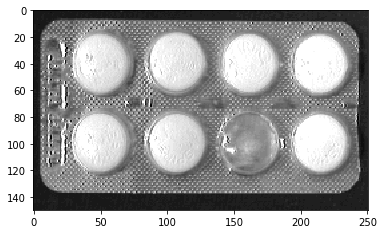

In [4]:
im2 = mpimg.imread('../data/astablet.tif')
plt.imshow(im2, cmap='gray')

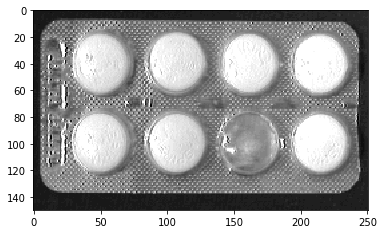

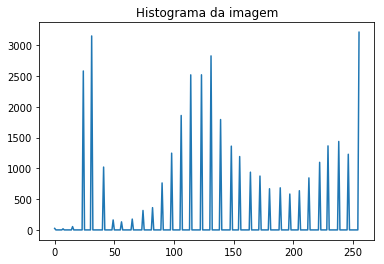

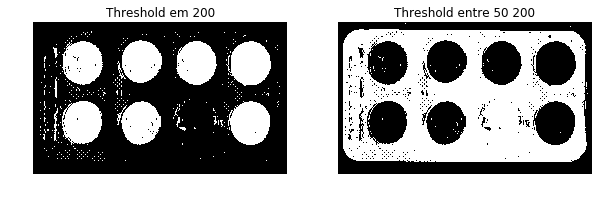

In [5]:
# Algumas transformações do tutorial
f_ex2 = ia.normalize(np.array(im2))

T1_ex2 = np.arange(256).astype('uint8')
T2_ex2 = ia.normalize(T1_ex2 > 200)
T3_ex2 = ia.normalize(np.logical_and(T1_ex2 > 50, T1_ex2 < 200))

f2_ex2 = T2_ex2[f_ex2]
f3_ex2 = T3_ex2[f_ex2]

plt.imshow(f_ex2, cmap='gray', vmax=255)
plt.show()

h_ex2 = ia.histogram(f_ex2)
plt.title('Histograma da imagem')
plt.plot(h_ex2)
plt.show()

fig=plt.figure(figsize=(10, 10))

plt.subplot(121).axis('off')
plt.title('Threshold em 200')
plt.imshow(f2_ex2, cmap='gray', vmax=255)


plt.subplot(122).axis('off')
plt.title('Threshold entre 50 200')
plt.imshow(f3_ex2, cmap='gray', vmax=255)

plt.show()

### Parte 2 - Demonstração da limiarização por Otsu

Tente melhorar a demonstração da limiarização por Otsu ([Demo](../master/otsudemo.ipynb)).

In [9]:
def otsu(f):
    n = np.product(np.shape(f))
    h = 1.*np.bincount(f.ravel()) / n  
    if len(h) == 1: return 1,1
    x = np.arange(np.product(np.shape(h)))
    w0 = np.cumsum(h)
    w1 = 1 - w0
    eps = 1e-10
    m0 = np.cumsum(x * h) / (w0 + eps)
    mt = m0[-1]
    m1 = (mt - m0[0:-1]*w0[0:-1]) / w1[0:-1]
    sB2 = w0[0:-1] * w1[0:-1] * ((m0[0:-1] - m1)**2)

    t = np.argmax(sB2)
    v = sB2[t]
    st2 = sum((x-mt)**2 * h)
    eta = v / st2

    return t, eta

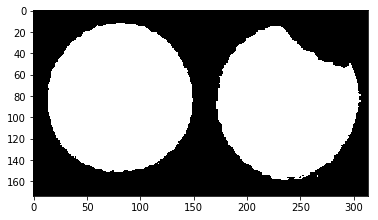

In [21]:
f_p2 = np.array(mpimg.imread('../figures/cookies.pgm'))
t, eta = otsu(f_p2)
plt.imshow(f_p2 > t,cmap='gray')

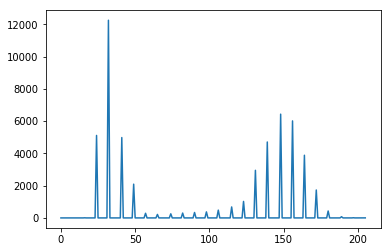

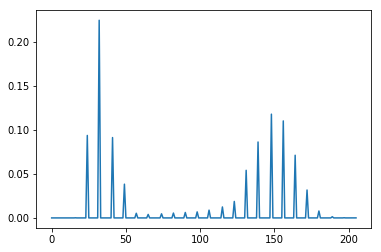

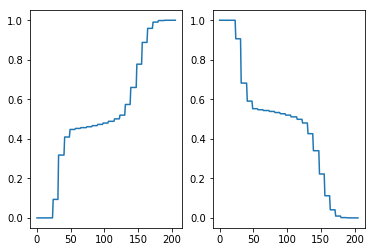

In [46]:
H = ia.histogram(f_p2)
x = np.arange(len(H))
plt.plot(x, H)
plt.show()

h = 1.*np.bincount(f_p2.ravel()) / np.product(f_p2.shape)
plt.plot(h)
plt.show()

w0 = np.cumsum(h)
aux = h
w1aux = np.cumsum(aux)
w1 = 1 - w0

plt.subplot(121)
plt.plot(x,w0)
plt.subplot(122)
plt.plot(x,w1)
plt.show()

### Parte 3 - Segmentação por watershed

Tentem reproduzir a demonstração de segmentação por watershed da antiga toolbox ([pdf](../data/ia870_iadbeef.pdf)). Vocês podem usar as funções de watershed implementadas na biblioteca *scipy.ndimage.measurements* ou *skimage.morphology*. Você pode também se inspirar no Seminário do Eduardo ([link](./Seminarios/Watershed.ipynb)).
Quem quiser conhecer todos os algoritmos da Transformada de Watershed, eles estão descritos na Toolbox de Watershed desenvolvida por um de nossos alunos ([Toolbox Watershed](http://adessowiki.fee.unicamp.br/adesso/wiki/watershed/view/))

In [ ]:
import matplotlib as mpt
from scipy import ndimage
from PIL import Image
mpt.rc('image', cmap='gray')

f_p3 = np.array(Image.open('../data/beef.tif').convert('L'))

In [ ]:
plt.imshow(f_p3)
plt.show()

**Fernando:** O primeiro método que utilizei foi com um closing, depois uma dilatação, para que a parte da carne ficasse totalmente fechada.

In [ ]:
closed = ndimage.grey_closing(f_p3, size=(7, 7))

closed = ndimage.grey_dilation(closed, size=(5,5))
plt.imshow(closed)

In [ ]:
markers = np.zeros_like(f_p3).astype('int16')
markers[0,0] = 1
markers[150,200] = 2
markers[240,200] = 2

water1 = ndimage.watershed_ift(f_p3, markers)

plt.imshow(water1)
plt.show()

O resultado final ficou razoável, como pode ser visto abaixo. A biblioteca facilitou bastante.

In [ ]:
markers = np.zeros_like(closed).astype('int16')
markers[0,0] = 1
markers[150,200] = 2
markers[240,200] = 1

water2 = ndimage.watershed_ift(closed, markers)
plt.imshow(water2)
plt.show()

plt.imshow(f_p3)
plt.imshow(water2, cmap='hot', alpha=0.7)
plt.show()

In [ ]:
from skimage import data, segmentation
from skimage import filters

# coins = data.coins()
mask = water2
clean_border = segmentation.clear_border(water2)

beef_edges = segmentation.mark_boundaries(f_p3, clean_border, color=(1,0,0), mode='thick')
plt.imshow(beef_edges)
plt.show()

contour = segmentation.find_boundaries(water2)
plt.imshow(contour)

**Fenando:** No segundo método, tentei reproduzir exatamente o que está na demo, mas não consegui fazer com que o final ficasse igual, pois a segmentação do scipy não entende os marcadores que eu passei.

In [ ]:
small_cross = ndimage.generate_binary_structure(2,1)
big_cross = ndimage.iterate_structure(small_cross, 80)

print(big_cross)

In [ ]:
dilation1 = ndimage.grey_dilation(water1, structure=small_cross)
erosion1 = ndimage.grey_erosion(water1, (27, 27))
external = dilation1 - erosion1
plt.imshow(external)

external[external == external.max()] = external.max() + 1

In [ ]:
internal = ndimage.grey_erosion(water1, structure=big_cross)
plt.imshow(internal)

In [ ]:
union = external + internal
plt.imshow(union)

print(union)

In [ ]:
gradient = ndimage.morphological_gradient(closed, structure=small_cross)
plt.imshow(gradient)

In [ ]:
plt.imshow(ia.normalize(gradient))
plt.imshow(union, cmap='hot', alpha=0.5) # interpolation='none'
plt.show()

In [ ]:
markers = np.zeros_like(closed).astype('int16')

markers[0,0] = 1
markers[internal > 0] = 2
markers[external > 0] = 2


final = ndimage.watershed_ift(closed, union)
plt.imshow(final)

In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = f_p3

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(closed, external)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()